<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#bcbcbc;
           font-size:300%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:center"> Bone Marrow Changes in Lumbar Vertebrae MRI Classification</p>
</div>


<p style="text-align:center;"><img src="https://www.ajronline.org/cms/10.2214/AJR.11.7005/asset/images/12_11_7005_01.jpeg" width="200" height="350">
    
    
    
    
    
The objective of this project is to build a deep-learning model that can accurately classify MRI images as either Normal or Abnormal. The model will be trained on a dataset of labeled MRI images and will learn to identify specific patterns and features associated with Bone Marrow Changes in Lumbar Vertebrae. For Bone Marrow Changes in Lumbar Vertebrae classification, Bone Marrow Changes in Lumbar Vertebrae were divided into two main groups: Normal, and Abnormal, depending on the area that is involved. Each of these classes is subsequently divided into sub-groups. To introduce a transfer learning model that can improve the classification of Bone Marrow Changes in Lumbar Vertebrae.

In [1]:
# Import packages
#from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
# Define the general path
path = '/input/bonewithout-augment-70-20-10/boneWithOut_Augment/'

In [4]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'train', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


Found 712 images belonging to 2 classes.


In [5]:
valid_generator = valid_datagen.flow_from_directory(directory=path +'val', 
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)



Found 203 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(directory=path +'test',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)

Found 103 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Input

# Input shape for images
input_shape = (224, 224, 3)

# Load ResNet152 with ImageNet weights, excluding the top (fully connected) layers
resnet152_model = ResNet152(weights='imagenet', 
                            include_top=False,
                            input_shape=input_shape
                           )


234698864/234698864 [==============================] - 1s 0us/step


In [8]:
# Freezing Layers
for layer in resnet152_model.layers[:-1]:
   layer.trainable=False

In [9]:
model_resnet152 = tf.keras.Sequential()
model_resnet152.add(resnet152_model)
model_resnet152.add(Flatten())
model_resnet152.add(Dense(2,activation = 'softmax'))

In [10]:
model_resnet152.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [11]:
model_resnet152.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2)                 200706    
                                                                 
Total params: 58571650 (223.43 MB)
Trainable params: 200706 (784.01 KB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


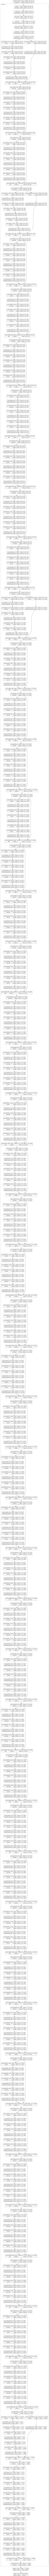

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model_resnet152,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

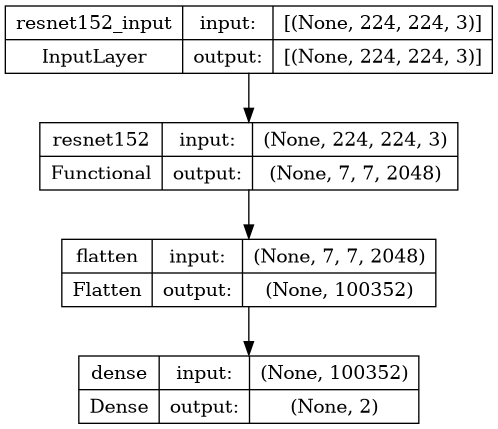

In [13]:
plot_model(model_resnet152,show_shapes=True, show_layer_names=True, rankdir='TB')

In [14]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size


In [15]:
# Stop the training when there is no improvement after 10 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [16]:
# Train the model
history =model_resnet152.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=20, callbacks=early_stop)

Epoch 1/20
22/22 [==============================] - 245s 11s/step - loss: 2.4778 - accuracy: 0.5206 - val_loss: 0.7018 - val_accuracy: 0.6458
Epoch 2/20
22/22 [==============================] - 190s 9s/step - loss: 1.3898 - accuracy: 0.5724 - val_loss: 1.8548 - val_accuracy: 0.5625
Epoch 3/20
22/22 [==============================] - 189s 9s/step - loss: 1.2487 - accuracy: 0.5412 - val_loss: 1.2184 - val_accuracy: 0.5365
Epoch 4/20
22/22 [==============================] - 187s 9s/step - loss: 0.8481 - accuracy: 0.5838 - val_loss: 0.5802 - val_accuracy: 0.7188
Epoch 5/20
22/22 [==============================] - 231s 11s/step - loss: 0.5547 - accuracy: 0.6824 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 6/20
22/22 [==============================] - 187s 9s/step - loss: 0.5649 - accuracy: 0.7147 - val_loss: 0.6367 - val_accuracy: 0.6302
Epoch 7/20
22/22 [==============================] - 184s 9s/step - loss: 0.6013 - accuracy: 0.6750 - val_loss: 0.6839 - val_accuracy: 0.5938
Epoch 8/20


In [17]:
# Evaluate the model
model_resnet152.evaluate(valid_generator,steps=STEP_SIZE_VALID)

6/6 [==============================] - 40s 7s/step - loss: 0.5671 - accuracy: 0.7083


[0.5670628547668457, 0.7083333134651184]

In [18]:
# Save the model
model_resnet152.save("model_XCEPTION")

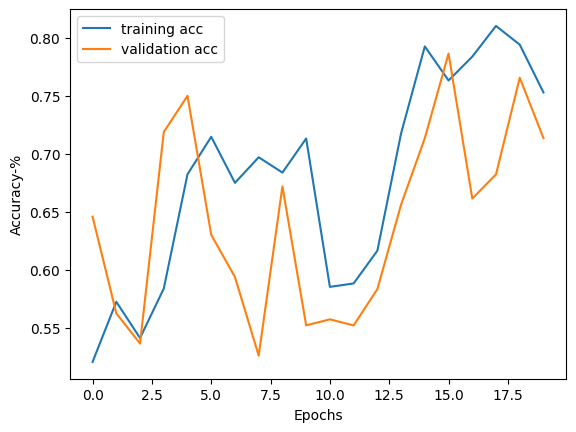

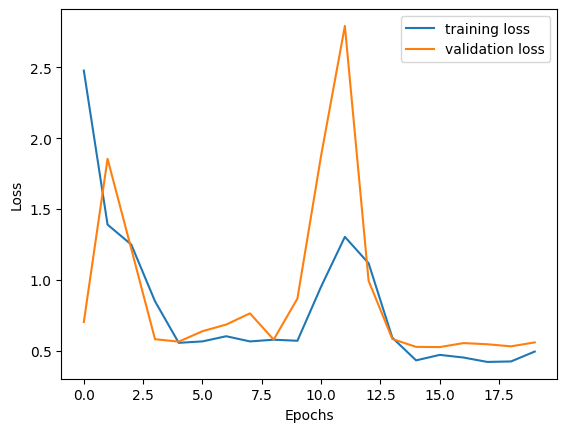

In [19]:
# plot learning curve
def plot_learning_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-%')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_learning_curve(history)

In [20]:
#info about optimizers
model_resnet152.optimizer.get_config() 

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model_resnet152.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


103/103 [==============================] - 31s 267ms/step


In [22]:
predictions[0:5]

['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal']

In [23]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/103
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 74.76%.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Actual, predictions))

              precision    recall  f1-score   support

    Abnormal       0.71      0.91      0.80        56
      Normal       0.84      0.55      0.67        47

    accuracy                           0.75       103
   macro avg       0.77      0.73      0.73       103
weighted avg       0.77      0.75      0.74       103



In [25]:
print(confusion_matrix(Actual, predictions))

[[51  5]
 [21 26]]


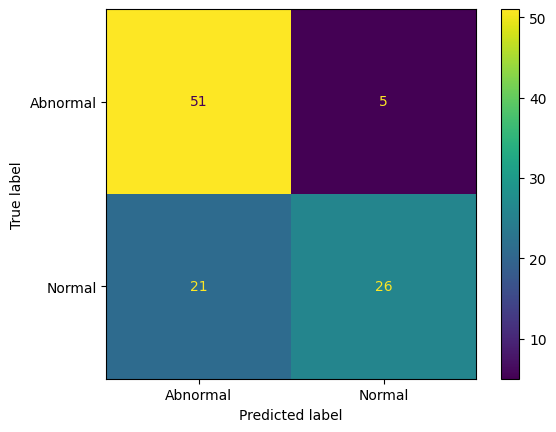

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Actual, predictions)

In [27]:
%who

Actual	 BatchNormalization	 ConfusionMatrixDisplay	 Conv2D	 Dense	 Dropout	 EarlyStopping	 Flatten	 ImageDataGenerator	 
Input	 MaxPool2D	 ResNet152	 STEP_SIZE_TEST	 STEP_SIZE_TRAIN	 STEP_SIZE_VALID	 Sequential	 acc	 actual	 
classification_report	 confusion_matrix	 count_accurate	 current_idx	 early_stop	 history	 i	 input_shape	 labels	 
layer	 model_resnet152	 np	 path	 plot_learning_curve	 plot_model	 plt	 pred	 predicted_class_indices	 
predictions	 preprocessing	 resnet152_model	 string	 substr	 test_datagen	 test_generator	 tf	 train_datagen	 
train_generator	 valid_datagen	 valid_generator	 


In [28]:
acc

0.7475728155339806

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Assuming 'Actual' and 'predictions' are arrays or lists
conf_matrix = confusion_matrix(Actual, predictions)
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
tn
# Calculate metrics
accuracy = accuracy_score(Actual, predictions)
precision = precision_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
recall = recall_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label
specificity = tn / (tn + fp)
f1 = f1_score(Actual, predictions, pos_label='Abnormal')  # Specify the positive label

# Print the results
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Specificity: {round(specificity, 4)}")
print(f"F1-score: {round(f1, 4)}")
print(f"TN: {round(tn)}")
print(f"FP: {round(fp)}")
print(f"FN: {round(fn)}")
print(f"TP: {round(tp)}")

Accuracy: 0.7476
Precision: 0.7083
Recall: 0.9107
Specificity: 0.9107
F1-score: 0.7969
TN: 51
FP: 5
FN: 21
TP: 26
